In [ ]:
!pip install scikeras tensorflow


<ipython-input-11-a736b1d2a811>:22: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  all_gw_data = pd.read_csv('all_gw_data.csv')



Missing values before cleaning:
goals_scored           0
assists                0
total_points           0
minutes                0
goals_conceded         0
creativity             0
influence              0
threat                 0
bonus                  0
bps                    0
ict_index              0
clean_sheets           0
red_cards              0
yellow_cards           0
selected_by_percent    0
now_cost               0
season                 0
name                   0
element_type           0
dtype: int64

Sample of Training Features (X_train):
[[ 1.81082981 -0.10975762  0.8503483  ... -0.31941019  1.36249146
  -0.46403117]
 [-0.45221293 -0.53334989 -0.92749622 ... -0.31941019 -0.73394955
  -0.46403117]
 [ 2.45741345  1.58461149  1.85934488 ... -0.31941019  1.36249146
  -0.46403117]
 [-0.45221293 -0.53334989 -0.89677954 ... -0.31941019 -0.73394955
   2.15502764]
 [-0.12892111 -0.53334989  0.96297615 ... -0.31941019 -0.73394955
  -0.46403117]]

Sample of Training Target (y_tra

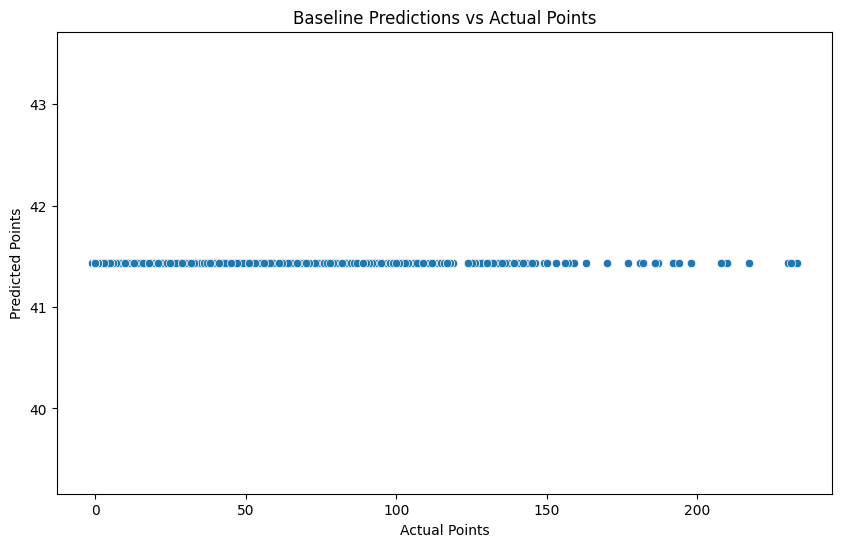


Training Model: Random Forest
Model: Random Forest
Mean Absolute Error (MAE): 3.45
R^2 Score: 0.99


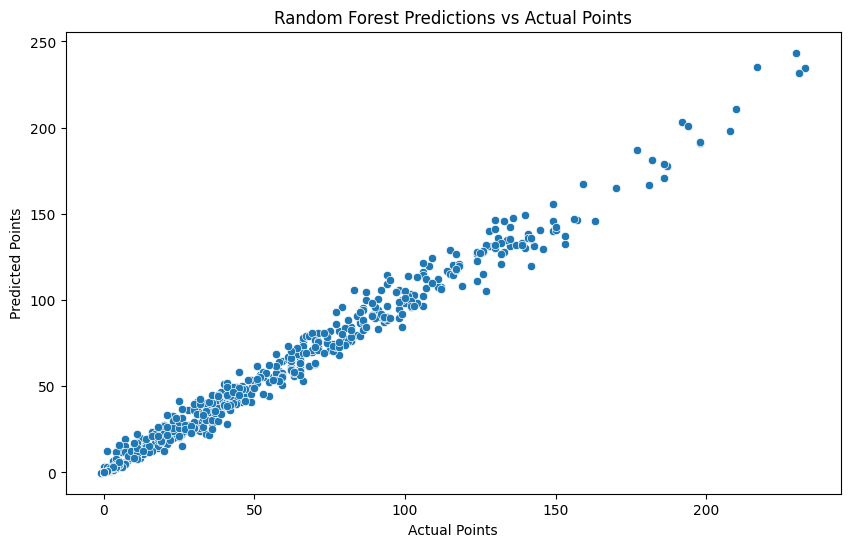


Training Model: XGBoost
Model: XGBoost
Mean Absolute Error (MAE): 3.46
R^2 Score: 0.99


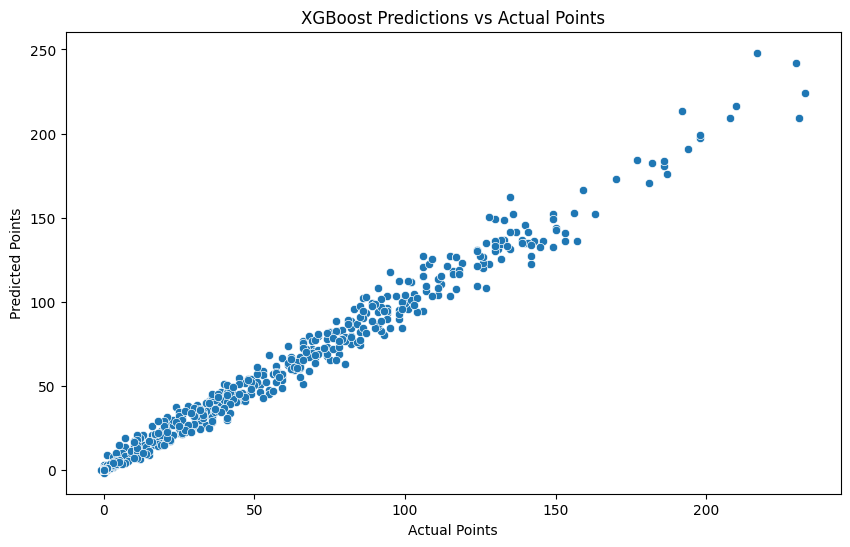


Training Model: Neural Net


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: Neural Net
Mean Absolute Error (MAE): 9.84
R^2 Score: 0.91


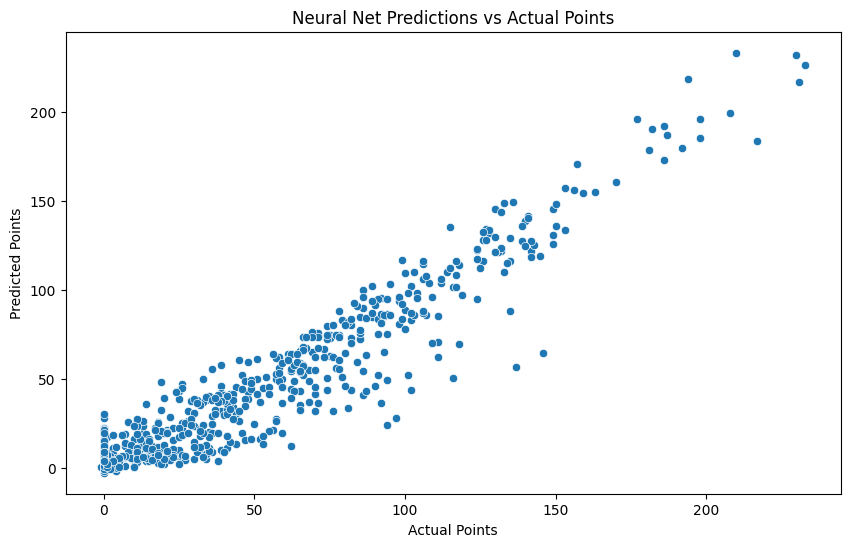

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from scikeras.wrappers import KerasRegressor  # Use scikeras wrapper instead of TensorFlow's
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
all_gw_data = pd.read_csv('all_gw_data.csv')
player_data = pd.read_csv('player_data.csv')
master_teams_updated = pd.read_csv('master_teams_updated.csv')
fixtures_data = pd.read_csv('fixtures_data.csv')
combined_player_data = pd.read_csv('combined_player_data.csv')# Step 1: Data Cleaning & Preprocessing
# --------------------------------------
# Strip any leading/trailing spaces in column names
combined_player_data.columns = combined_player_data.columns.str.strip()

# Fill missing values for categorical column 'element_type' with a placeholder
combined_player_data['element_type'] = combined_player_data['element_type'].fillna('Unknown')

# Check for missing values in the combined player data
print("\nMissing values before cleaning:")
print(combined_player_data.isnull().sum())

# Step 2: Feature Engineering
# ---------------------------
# Define features (X) and target (y)
X = combined_player_data.drop(['total_points'], axis=1)
y = combined_player_data['total_points']

# Manually handle categorical encoding using OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Diagnostic Check on Training Data
print("\nSample of Training Features (X_train):")
print(X_train[:5])
print("\nSample of Training Target (y_train):")
print(y_train.head())

# Step 3: Building the Models
# ---------------------------
# Model Dictionary
models = {
    'Baseline': DummyRegressor(strategy='mean'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Function to create a Neural Network model
def build_neural_net():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])
    return model

# Add Neural Network to the models dictionary using KerasRegressor wrapper from scikeras
models['Neural Net'] = KerasRegressor(model=build_neural_net, epochs=50, batch_size=32, verbose=0)

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Model: {model_name}")

    # Fit the model
    try:
        model.fit(X_train, y_train)

        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Model: {model_name}")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"R^2 Score: {r2:.2f}")

        # Visualization of predictions
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Points')
        plt.ylabel('Predicted Points')
        plt.title(f'{model_name} Predictions vs Actual Points')
        plt.show()

    except Exception as e:
        print(f"Error while training {model_name}: {e}")

Model: Baseline
Mean Absolute Error (MAE): 39.63
R^2 Score: -0.00
Model: Random Forest
Mean Absolute Error (MAE): 3.45
R^2 Score: 0.99
Model: XGBoost
Mean Absolute Error (MAE): 3.46
R^2 Score: 0.99
Model: Neural Net
Mean Absolute Error (MAE): 9.84
R^2 Score: 0.91


<ipython-input-12-6075e6414e41>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mae_scores, palette="Blues_d")
<ipython-input-12-6075e6414e41>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")


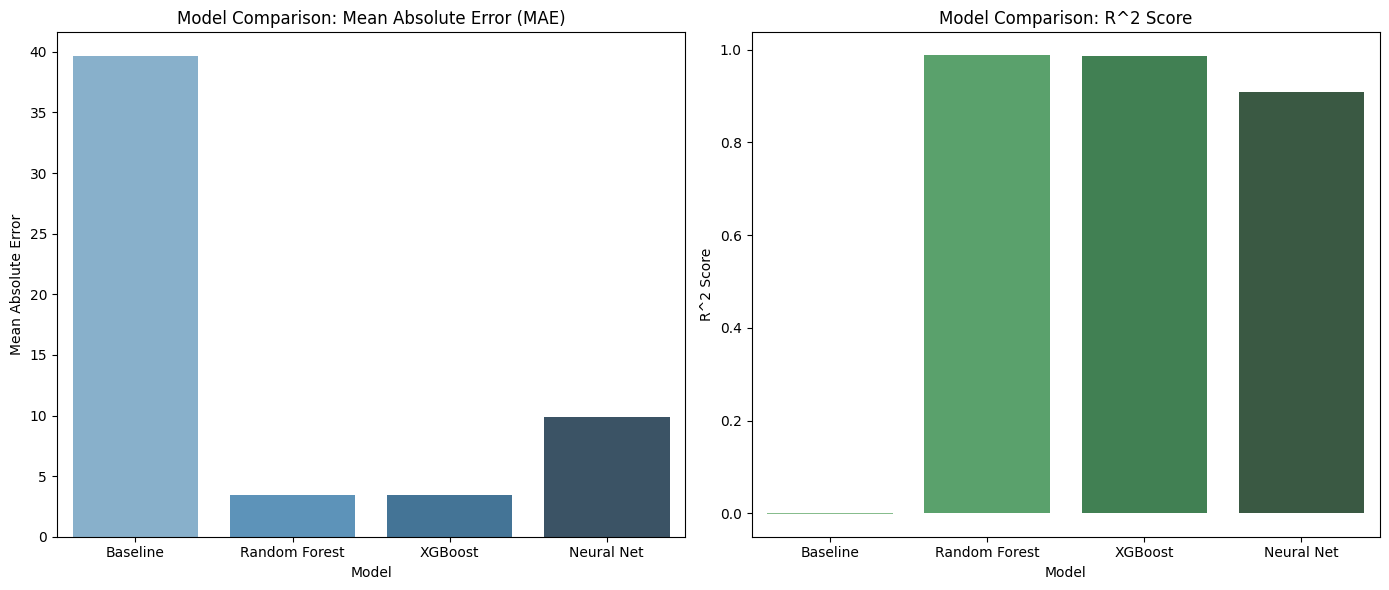


Predictions for Future Games:
           Baseline  Random Forest    XGBoost  Neural Net
name                                                     
Player A  41.437645          24.16  28.806208   26.466846
Player B  41.437645          13.80  10.010041    8.662657
Player C  41.437645          27.85  25.225590    9.781155


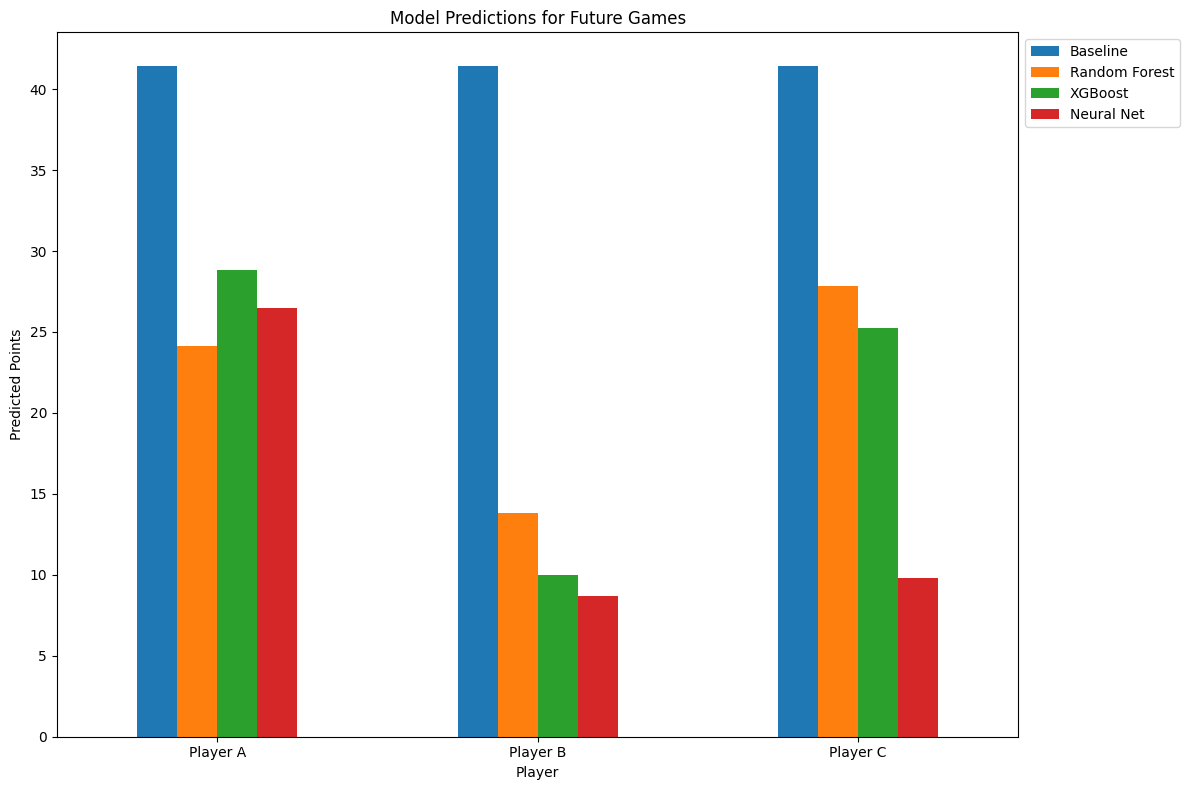

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize lists to collect metrics for comparison
model_names = []
mae_scores = []
r2_scores = []

# Collect performance metrics for each model
for model_name, model in models.items():
    try:
        # Predict on test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        model_names.append(model_name)
        mae_scores.append(mae)
        r2_scores.append(r2)

        print(f"Model: {model_name}")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"R^2 Score: {r2:.2f}")

    except Exception as e:
        print(f"Error while evaluating {model_name}: {e}")

# Plot model performance comparison
plt.figure(figsize=(14, 6))

# MAE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mae_scores, palette="Blues_d")
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')

# R^2 Score Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores, palette="Greens_d")
plt.title('Model Comparison: R^2 Score')
plt.ylabel('R^2 Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

# Step 2: Predictions for Future Games (Hypothetical Data)
# ---------------------------------------------------------
# Create a sample dataframe for future predictions based on hypothetical player stats
future_data = pd.DataFrame({
    'goals_scored': [2, 1, 0],
    'assists': [1, 0, 2],
    'minutes': [90, 75, 45],
    'goals_conceded': [0, 2, 1],
    'creativity': [50.0, 25.0, 75.0],
    'influence': [80.0, 60.0, 90.0],
    'threat': [60.0, 45.0, 70.0],
    'bonus': [3, 1, 2],
    'bps': [30, 20, 25],
    'ict_index': [35.0, 20.0, 50.0],
    'clean_sheets': [1, 0, 0],
    'red_cards': [0, 0, 0],
    'yellow_cards': [0, 1, 0],
    'selected_by_percent': [5.0, 10.0, 3.5],
    'now_cost': [60, 55, 58],
    'season': ['2024-25', '2024-25', '2024-25'],
    'name': ['Player A', 'Player B', 'Player C'],
    'element_type': ['MID', 'DEF', 'FWD']
})

# Encode the future data similarly to training data
future_data_encoded = pd.get_dummies(future_data, columns=categorical_cols, drop_first=True)
# Align future data columns with X_encoded
future_data_encoded = future_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Standardize future data using the same scaler
future_data_scaled = scaler.transform(future_data_encoded)

# Step 3: Predictions for Future Games
# -------------------------------------
# Create a dictionary to store predictions
future_predictions = {}

# Predict using each model
for model_name, model in models.items():
    try:
        future_pred = model.predict(future_data_scaled)
        future_predictions[model_name] = future_pred
    except Exception as e:
        future_predictions[model_name] = f"Error: {e}"

# Display predictions for each model
future_predictions_df = pd.DataFrame(future_predictions, index=future_data['name'])
print("\nPredictions for Future Games:")
print(future_predictions_df)

# Plot Predictions for Future Games
future_predictions_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Predictions for Future Games')
plt.ylabel('Predicted Points')
plt.xlabel('Player')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


No current season file provided. Using simulated data.

Predictions for the Current Season:
           Baseline  Random Forest    XGBoost  Neural Net
name                                                     
Player D  41.437645          30.32  26.620560   20.721462
Player E  41.437645          12.21  11.382311    8.325450
Player F  41.437645          21.17  22.054565   12.641704
Player G  41.437645          30.13  28.584385   21.612804
Player H  41.437645          13.10  11.133330    9.312238


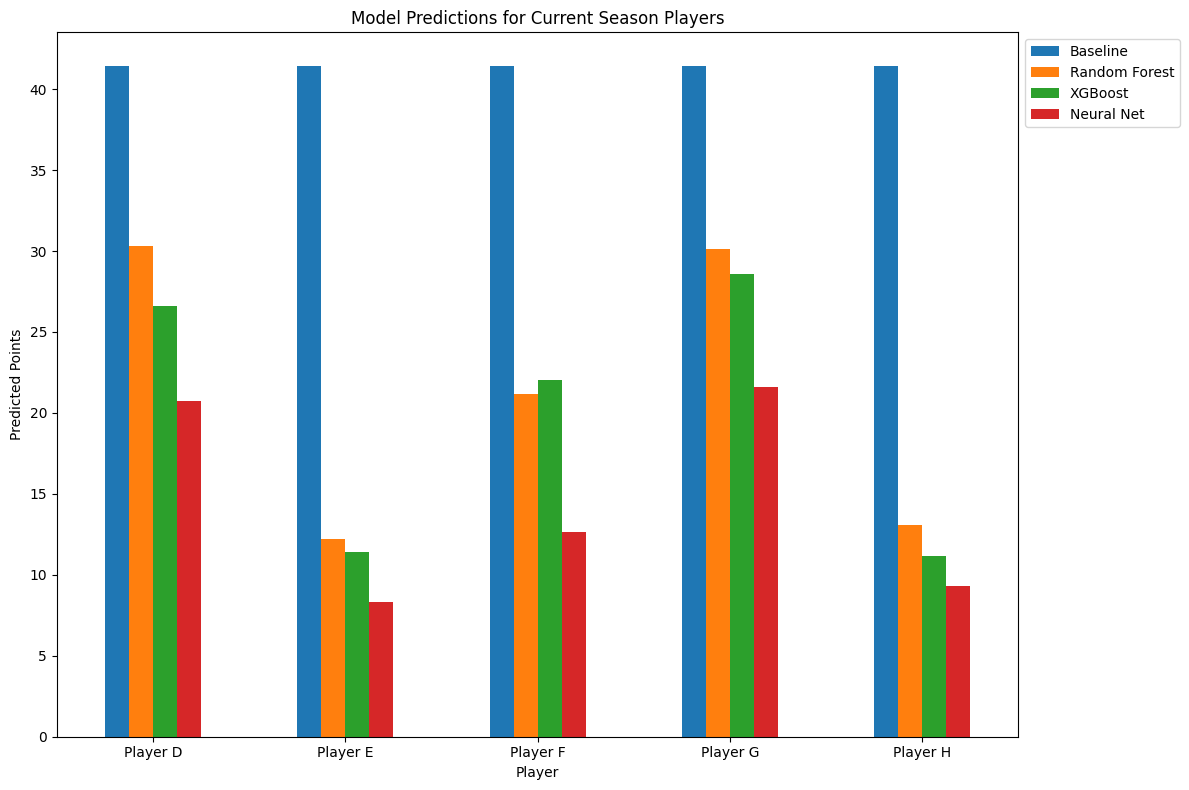

In [ ]:
try:
    current_season_data = pd.read_csv('data/current_season_data.csv')
    print("Loaded current season data from file.")
except FileNotFoundError:
    print("No current season file provided. Using simulated data.")
    # Simulate a small dataset for the current season
    current_season_data = pd.DataFrame({
        'goals_scored': [3, 0, 1, 2, 1],
        'assists': [2, 1, 0, 0, 1],
        'minutes': [90, 80, 60, 75, 90],
        'goals_conceded': [1, 0, 2, 1, 1],
        'creativity': [80.0, 30.0, 45.0, 60.0, 25.0],
        'influence': [100.0, 55.0, 65.0, 80.0, 40.0],
        'threat': [85.0, 25.0, 50.0, 70.0, 30.0],
        'bonus': [2, 0, 1, 3, 1],
        'bps': [35, 10, 20, 25, 15],
        'ict_index': [45.0, 18.0, 35.0, 50.0, 20.0],
        'clean_sheets': [0, 1, 0, 0, 0],
        'red_cards': [0, 0, 0, 0, 0],
        'yellow_cards': [0, 1, 0, 0, 0],
        'selected_by_percent': [6.5, 12.0, 4.0, 8.0, 3.0],
        'now_cost': [62, 54, 59, 60, 55],
        'season': ['2024-25', '2024-25', '2024-25', '2024-25', '2024-25'],
        'name': ['Player D', 'Player E', 'Player F', 'Player G', 'Player H'],
        'element_type': ['FWD', 'DEF', 'MID', 'MID', 'DEF']
    })

# Encode current season data similarly to training data
current_season_encoded = pd.get_dummies(current_season_data, columns=categorical_cols, drop_first=True)
# Align columns with the training data structure
current_season_encoded = current_season_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Standardize current season data using the same scaler
current_season_scaled = scaler.transform(current_season_encoded)

# Step 3: Predict and Evaluate Models on Current Season Data
# -----------------------------------------------------------
# Create a dictionary to store predictions for the current season
current_season_predictions = {}

# Predict using each model and compare to actual values if available
for model_name, model in models.items():
    try:
        current_pred = model.predict(current_season_scaled)
        current_season_predictions[model_name] = current_pred
    except Exception as e:
        current_season_predictions[model_name] = f"Error: {e}"

# Display predictions for each model
current_predictions_df = pd.DataFrame(current_season_predictions, index=current_season_data['name'])
print("\nPredictions for the Current Season:")
print(current_predictions_df)

# Plot Predictions for Current Season
current_predictions_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Predictions for Current Season Players')
plt.ylabel('Predicted Points')
plt.xlabel('Player')
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Cleaned Players Data:
  first_name           second_name  goals_scored  assists  total_points  \
0      Fábio       Ferreira Vieira             0        0             0   
1    Gabriel     Fernando de Jesus             0        0             0   
2    Gabriel  dos Santos Magalhães             0        0            12   
3        Kai               Havertz             1        1            14   
4       Karl                  Hein             0        0             0   

   minutes  goals_conceded  creativity  influence  threat  bonus  bps  \
0        0               0         0.0        0.0     0.0      0    0   
1        5               0         0.8        0.2     0.0      0    1   
2      180               0         3.3       35.2     8.0      1   47   
3      180               0        30.2       54.8    61.0      3   46   
4        0               0         0.0        0.0     0.0      0    0   

   ict_index  clean_sheets  red_cards  yellow_cards  selected_by_percent  \
0        0.

<ipython-input-16-df63b5ce9964>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats_filtered['element_type'] = players_stats_filtered['element_type'].fillna('Unknown')



Predictions for Current Season with Player Names:
                               Baseline  Random Forest    XGBoost  Neural Net  \
name                                                                            
Fábio Ferreira Vieira         41.437645           0.00   0.084592   17.468441   
Gabriel Fernando de Jesus     41.437645           0.94   0.992404    1.468617   
Gabriel dos Santos Magalhães  41.437645           9.90  11.553938    0.655354   
Kai Havertz                   41.437645          14.57  17.288904   25.364559   
Karl Hein                     41.437645           0.00   0.068928    0.167981   

                              Actual Points  
name                                         
Fábio Ferreira Vieira                   NaN  
Gabriel Fernando de Jesus               NaN  
Gabriel dos Santos Magalhães            NaN  
Kai Havertz                             NaN  
Karl Hein                               NaN  


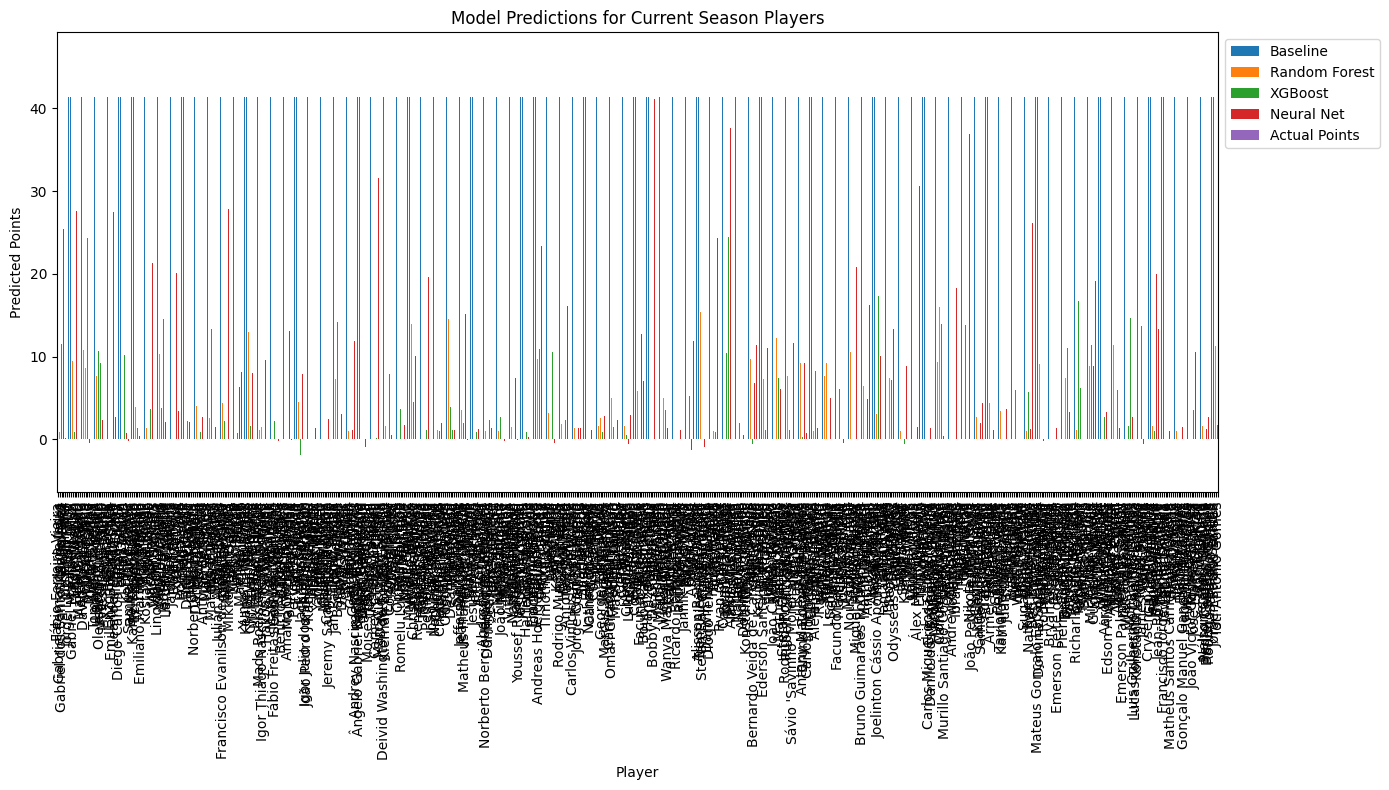

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Load the current season data files
cleaned_players = pd.read_csv('cleaned_players.csv')
fixtures = pd.read_csv('fixtures.csv')
player_idlist = pd.read_csv('player_idlist.csv')
players_raw = pd.read_csv('players_raw.csv')
teams = pd.read_csv('teams.csv')

# Display basic information about each dataset to understand its structure
print("\nCleaned Players Data:")
print(cleaned_players.head())
print("\nFixtures Data:")
print(fixtures.head())
print("\nPlayer ID List Data:")
print(player_idlist.head())
print("\nPlayers Raw Data:")
print(players_raw.head())
print("\nTeams Data:")
print(teams.head())

# Step 1: Process the current season data
# -----------------------------------------
# Merge player data with their IDs to get player names
players_stats = pd.merge(players_raw, player_idlist, left_on='id', right_on='id', how='left')

# Check available columns in the merged dataset for verification
print("\nAvailable columns in merged player stats:")
print(players_stats.columns)

# Adjust column references based on the merge result
# Use 'first_name_x' and 'second_name_x' from merged dataset to form the 'name'
players_stats['name'] = players_stats['first_name_x'] + ' ' + players_stats['second_name_x']

# Verify if 'season' exists or create it
if 'season' not in players_stats.columns:
    # Add the current season placeholder
    players_stats['season'] = '2024-25'

# Select relevant features for prediction similar to the previous dataset
players_stats_filtered = players_stats[['goals_scored', 'assists', 'minutes', 'goals_conceded',
                                        'creativity', 'influence', 'threat', 'bonus', 'bps',
                                        'ict_index', 'clean_sheets', 'red_cards', 'yellow_cards',
                                        'selected_by_percent', 'now_cost', 'season', 'name',
                                        'element_type']]

# Display the filtered data for verification
print("\nFiltered Player Stats for Prediction:")
print(players_stats_filtered.head())

# Handle missing data similar to how we did with historical data
players_stats_filtered['element_type'] = players_stats_filtered['element_type'].fillna('Unknown')

# Encode the current season data similarly to training data
players_stats_encoded = pd.get_dummies(players_stats_filtered, columns=categorical_cols, drop_first=True)
# Align with the training data's column structure
players_stats_encoded = players_stats_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Standardize the current season data using the same scaler
players_stats_scaled = scaler.transform(players_stats_encoded)

# Step 2: Prediction Using Trained Models
# -----------------------------------------
# Predict using each model trained previously
current_season_predictions = {}

for model_name, model in models.items():
    try:
        current_pred = model.predict(players_stats_scaled)
        current_season_predictions[model_name] = current_pred
    except Exception as e:
        current_season_predictions[model_name] = f"Error: {e}"

# Collect predictions into a DataFrame
current_predictions_df = pd.DataFrame(current_season_predictions, index=players_stats_filtered['name'])
current_predictions_df['Actual Points'] = players_stats_filtered['goals_scored']  # Replace with actual points if available

# Display predictions with player names
print("\nPredictions for Current Season with Player Names:")
print(current_predictions_df.head())

# Plot Predictions for Current Season
current_predictions_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Predictions for Current Season Players')
plt.ylabel('Predicted Points')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


<ipython-input-18-95d0d492b32f>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=performance_df_current, palette='Blues_d')
<ipython-input-18-95d0d492b32f>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=performance_df_current, palette='Greens_d')


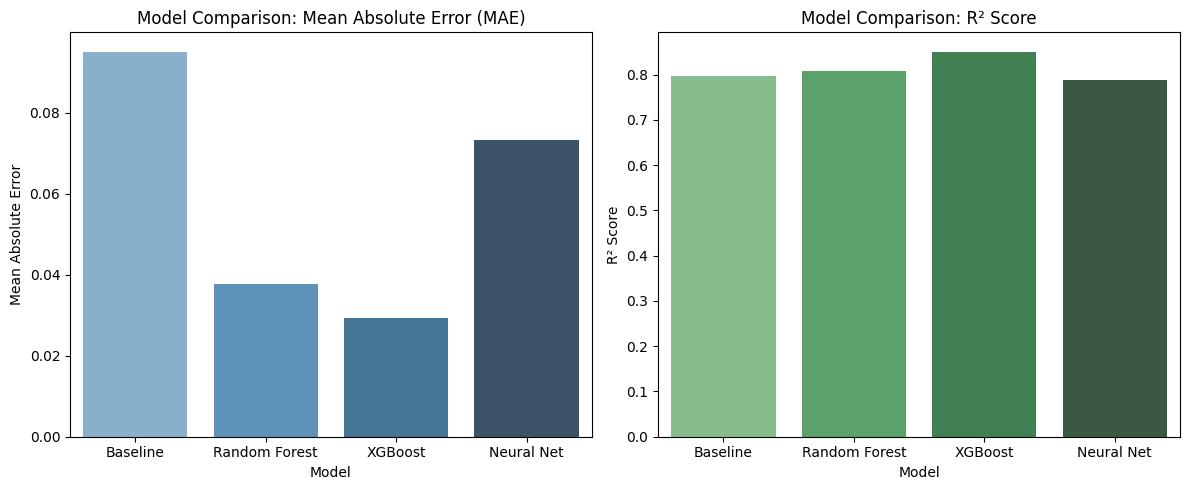


Model Performance Metrics (Current Season):
           Model       MAE  R² Score
0       Baseline  0.095126  0.797890
1  Random Forest  0.037619  0.808138
2        XGBoost  0.029441  0.850835
3     Neural Net  0.073307  0.788728


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import make_column_selector as selector
import matplotlib.pyplot as plt
import seaborn as sns

# Load the current season data (assuming `players_stats_filtered` is the relevant dataset)
# Convert categorical data to numerical using encoding
categorical_cols = ['element_type', 'season']
players_stats_encoded = pd.get_dummies(players_stats_filtered, columns=categorical_cols, drop_first=True)

# Select features (X) and target (y) from current season data
X_current = players_stats_encoded.drop(['name', 'goals_scored'], axis=1)  # Excluding name and keeping 'goals_scored' as the target
y_current = players_stats_encoded['goals_scored']

# Split the data into training and test sets
X_train_current, X_test_current, y_train_current, y_test_current = train_test_split(
    X_current, y_current, test_size=0.2, random_state=42
)

# Standard scaling for numerical data
scaler_current = StandardScaler()
X_train_scaled = scaler_current.fit_transform(X_train_current)
X_test_scaled = scaler_current.transform(X_test_current)

# Train the models
models_current = {
    'Baseline': LinearRegression(),  # Using Linear Regression as a simple baseline
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train Neural Net separately due to its different setup
def build_neural_net():
    model = Sequential([
        Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate each model
model_performance_current = {
    'Model': [],
    'MAE': [],
    'R² Score': []
}

for model_name, model in models_current.items():
    # Train model
    model.fit(X_train_scaled, y_train_current)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test_current, y_pred)
    r2 = r2_score(y_test_current, y_pred)

    # Store the results
    model_performance_current['Model'].append(model_name)
    model_performance_current['MAE'].append(mae)
    model_performance_current['R² Score'].append(r2)

# Train the Neural Net
neural_net_model = build_neural_net()
neural_net_model.fit(X_train_scaled, y_train_current, epochs=50, verbose=0)  # Training with 50 epochs

# Neural Net predictions and evaluation
y_pred_nn = neural_net_model.predict(X_test_scaled).flatten()
mae_nn = mean_absolute_error(y_test_current, y_pred_nn)
r2_nn = r2_score(y_test_current, y_pred_nn)

# Store Neural Net performance
model_performance_current['Model'].append('Neural Net')
model_performance_current['MAE'].append(mae_nn)
model_performance_current['R² Score'].append(r2_nn)

# Convert to DataFrame
performance_df_current = pd.DataFrame(model_performance_current)

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MAE', data=performance_df_current, palette='Blues_d')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')

# Plot R² Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R² Score', data=performance_df_current, palette='Greens_d')
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')

# Display the plots
plt.tight_layout()
plt.show()

# Display metrics in a table format
print("\nModel Performance Metrics (Current Season):")
print(performance_df_current)


In [ ]:
import pandas as pd

# Load the datasets
cleaned_players = pd.read_csv('cleaned_players.csv')
fixtures = pd.read_csv('fixtures.csv')
player_idlist = pd.read_csv('player_idlist.csv')
players_raw = pd.read_csv('players_raw.csv')
teams = pd.read_csv('teams.csv')

# Display first few rows to understand the data structure
print("Cleaned Players Data:")
print(cleaned_players.head())

print("\nFixtures Data:")
print(fixtures.head())

print("\nPlayer ID List Data:")
print(player_idlist.head())

print("\nPlayers Raw Data:")
print(players_raw.head())

print("\nTeams Data:")
print(teams.head())


Cleaned Players Data:
  first_name           second_name  goals_scored  assists  total_points  \
0      Fábio       Ferreira Vieira             0        0             0   
1    Gabriel     Fernando de Jesus             0        0             0   
2    Gabriel  dos Santos Magalhães             0        0            12   
3        Kai               Havertz             1        1            14   
4       Karl                  Hein             0        0             0   

   minutes  goals_conceded  creativity  influence  threat  bonus  bps  \
0        0               0         0.0        0.0     0.0      0    0   
1        5               0         0.8        0.2     0.0      0    1   
2      180               0         3.3       35.2     8.0      1   47   
3      180               0        30.2       54.8    61.0      3   46   
4        0               0         0.0        0.0     0.0      0    0   

   ict_index  clean_sheets  red_cards  yellow_cards  selected_by_percent  \
0        0.0

In [ ]:

# Merge player stats with player IDs for identification
players_raw_merged = pd.merge(players_raw, player_idlist, on=['first_name', 'second_name'], how='left')

# Add participation indicator based on fixture data
# This step aims to track if a player participated in a particular game week
game_week_data = []

for _, fixture in fixtures.iterrows():
    game_week = fixture['event']

    # Sample logic: if a player has non-zero minutes during the season, assume participation
    active_players = players_raw_merged[players_raw_merged['minutes'] > 0]

    for _, player in active_players.iterrows():
        # Estimate game-week points based on cumulative stats
        # Sample logic: normalizing by the number of games played
        estimated_points = player['points_per_game'] if player['points_per_game'] > 0 else 0

        # Create a record for the game-week estimation
        game_week_data.append({
            'first_name': player['first_name'],
            'second_name': player['second_name'],
            'game_week': game_week,
            'estimated_points': estimated_points,
            'minutes': player['minutes']
        })

# Convert to DataFrame for analysis
game_week_estimates_df = pd.DataFrame(game_week_data)

# Display updated game-week-level estimates
print("\nUpdated Estimated Game-Week-Level Data:")
print(game_week_estimates_df.head())
# Save the updated estimated dataset for future analysis
game_week_estimates_df.to_csv('updated_game_week_player_data.csv', index=False)


Updated Estimated Game-Week-Level Data:
  first_name           second_name  game_week  estimated_points  minutes
0    Gabriel     Fernando de Jesus          1               0.0        5
1    Gabriel  dos Santos Magalhães          1               6.0      180
2        Kai               Havertz          1               7.0      180
3    Jurriën                Timber          1               3.5       99
4    Gabriel      Martinelli Silva          1               3.0      154


Random Forest - Mean Absolute Error (MAE): 1.06
Random Forest - R² Score: 0.42


<ipython-input-33-5b8aff911ce4>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_test_data['predicted_points'] = rf_model.predict(selected_test_data[['minutes']])  # Use trained model for predictions


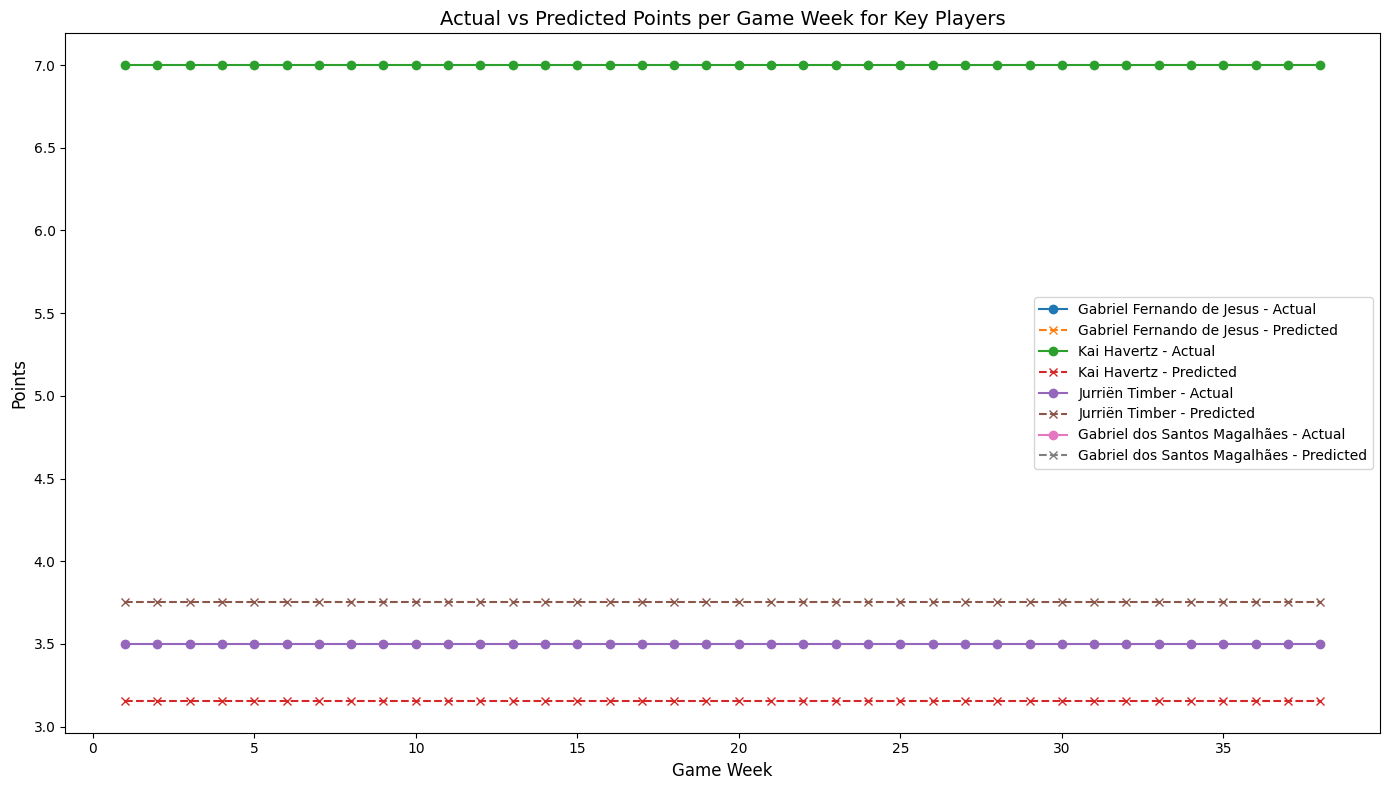

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated game-week data
game_week_data = pd.read_csv('updated_game_week_player_data.csv')

# Feature Selection: Use relevant features to predict 'estimated_points'
# You can extend the feature set based on data quality
X = game_week_data[['minutes']]  # Simple example, extend with more features if available
y = game_week_data['estimated_points']
players = game_week_data[['first_name', 'second_name']]
game_weeks = game_week_data['game_week']

# Split data for training and testing
X_train, X_test, y_train, y_test, players_train, players_test, gw_train, gw_test = train_test_split(
    X, y, players, game_weeks, test_size=0.3, random_state=42
)

# Train Random Forest Regressor as an example
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest - Mean Absolute Error (MAE): {mae:.2f}")
print(f"Random Forest - R² Score: {r2:.2f}")

# Visualization of Predictions vs Actual for Selected Game Weeks
# Example for key players like Mo Salah, Foden, Haaland, Saka, and Darwin Núñez

key_players = ['Gabriel Fernando de Jesus', 'Kai Havertz', 'Jurriën Timber', 'Gabriel dos Santos Magalhães']

# Filter the dataset for key players
selected_test_data = game_week_data[game_week_data['second_name'].isin([name.split()[-1] for name in key_players])]
selected_test_data['predicted_points'] = rf_model.predict(selected_test_data[['minutes']])  # Use trained model for predictions

# Group by player name and game week to see predictions vs. actual
grouped_data = selected_test_data.groupby(['second_name', 'game_week']).agg({
    'estimated_points': 'first',
    'predicted_points': 'first'
}).reset_index()

# Plot predictions vs actual points for selected key players across game weeks
plt.figure(figsize=(14, 8))
for player in key_players:
    player_data = grouped_data[grouped_data['second_name'] == player.split()[-1]]
    plt.plot(player_data['game_week'], player_data['estimated_points'], marker='o', label=f'{player} - Actual')
    plt.plot(player_data['game_week'], player_data['predicted_points'], marker='x', linestyle='--', label=f'{player} - Predicted')

# Add labels, title, and legend
plt.xlabel('Game Week', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.title('Actual vs Predicted Points per Game Week for Key Players', fontsize=14)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest - R² Score: {rf_r2}")


Random Forest - Mean Absolute Error (MAE): 1.0564096686467404
Random Forest - R² Score: 0.4164135478040796


In [ ]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluation
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost - Mean Absolute Error (MAE): {xgb_mae}")
print(f"XGBoost - R² Score: {xgb_r2}")


XGBoost - Mean Absolute Error (MAE): 1.0700724752032786
XGBoost - R² Score: 0.415576944432393


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network Model
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Predictions
nn_predictions = nn_model.predict(X_test).flatten()

# Evaluation
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Net - Mean Absolute Error (MAE): {nn_mae}")
print(f"Neural Net - R² Score: {nn_r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.4829
Epoch 2/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.3224
Epoch 3/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.3044
Epoch 4/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3032
Epoch 5/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3043
Epoch 6/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.3077
Epoch 7/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.3017
Epoch 8/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3124
Epoch 9/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.2925
Epoch 10/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.3058
Epoch 11/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.2998
Epoch 12/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.3044
Epoch 13/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3097
Epoch 14/50
9257/9257 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 1.2991
Epoch 15/50
925

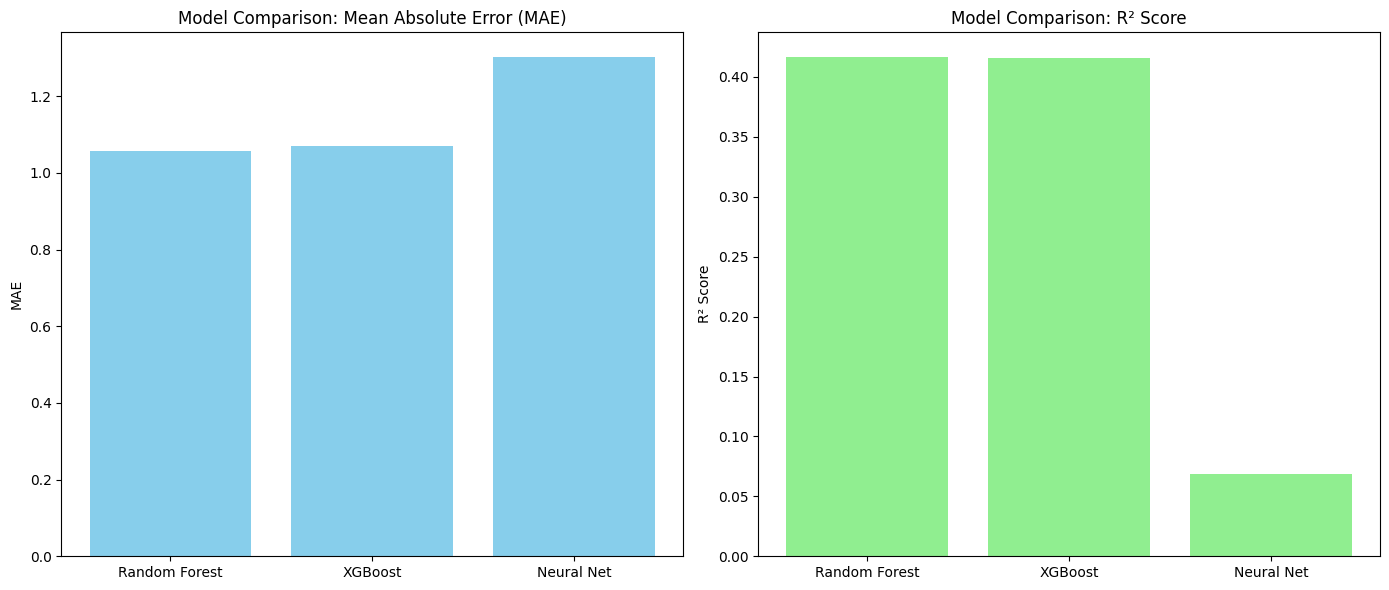

In [ ]:
# Comparing the model performances
models = ['Random Forest', 'XGBoost', 'Neural Net']
mae_scores = [rf_mae, xgb_mae, nn_mae]
r2_scores = [rf_r2, xgb_r2, nn_r2]

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color='skyblue')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plotting R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0053 - val_loss: 9.9387e-04
Epoch 2/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 9.3768e-04 - val_loss: 8.6038e-04
Epoch 4/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.4810e-04 - val_loss: 7.8149e-04
Epoch 5/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.6315e-04 - val_loss: 9.5872e-04
Epoch 6/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.3728e-04 - val_loss: 7.6871e-04
Epoch 7/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 6.3290e-04 - val_loss: 8.9285e-04
Epoch 8/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.0890e-04 - val_loss: 0.0012
Epoch 9/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 5.8534e-04 - val_loss: 8.7624e-04
Epoch 10/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.2790e-04 - val_loss: 0.0011
Epoch 11/50
596/596 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.7302e-04 - val_l

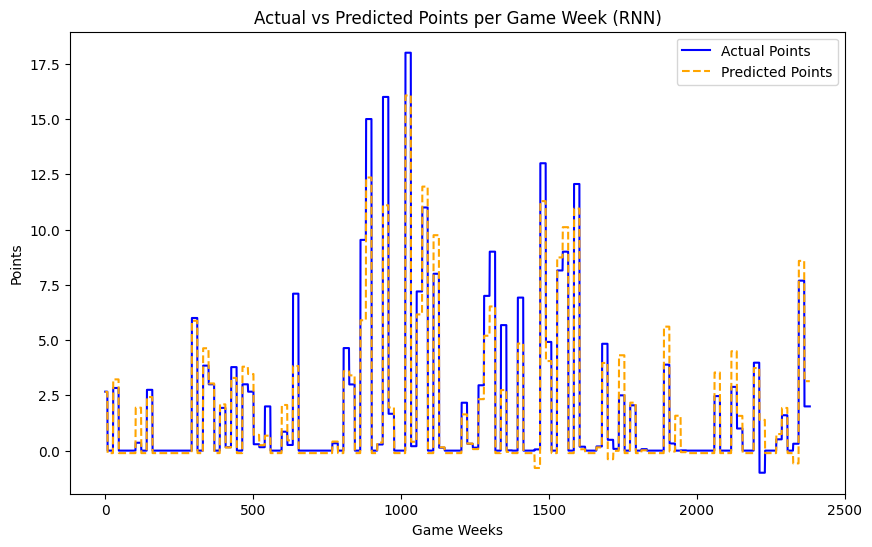

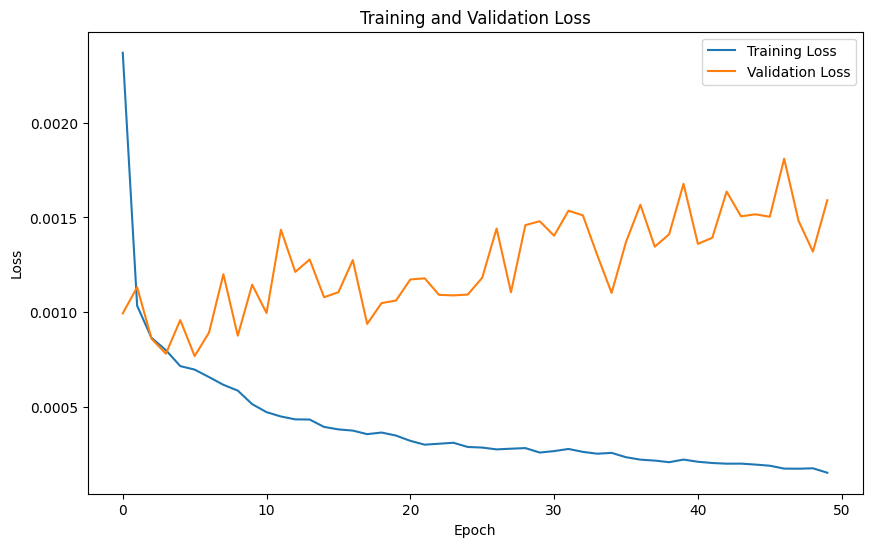

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
# Assuming you have the weekly player data stored in `estimated_game_week_data.csv`

# Load your estimated game-week data
game_week_data = pd.read_csv('estimated_game_week_player_data.csv')

# Select relevant features and target (points per game week)
features = ['minutes', 'goals_scored', 'assists', 'goals_conceded',
            'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index']
target = 'estimated_points'

# Normalize data (feature scaling)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(game_week_data[features])
scaled_target = scaler.fit_transform(game_week_data[[target]])

# Reshape input to 3D for RNN: (samples, time_steps, features)
# Here, we assume each game-week data is independent; if we have sequences per player, adjust accordingly.
X = scaled_features.reshape((scaled_features.shape[0], 1, scaled_features.shape[1]))
y = scaled_target

# Split data into train and test (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 2. RNN Model Implementation
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for points prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# 3. Model Performance
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"RNN - Mean Absolute Error (MAE): {mae}")
print(f"RNN - R² Score: {r2}")

# Plot predictions vs actual points
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Points', color='blue')
plt.plot(y_pred, label='Predicted Points', color='orange', linestyle='--')
plt.xlabel('Game Weeks')
plt.ylabel('Points')
plt.title('Actual vs Predicted Points per Game Week (RNN)')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
